# Import Required Libraries

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
from scipy import stats

# Loading Titanic data after EDA

In [205]:
# Let us consider 'titanic' dataset which has continous and categorical columns from seaborn module
titanic = pd.read_csv(r"titanic.csv")
titanic

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,True,Southampton,False
1,1,1,1,female,38.0,1,0,71.2833,False,Cherbourg,False
2,2,1,3,female,26.0,0,0,7.9250,False,Southampton,True
3,3,1,1,female,35.0,1,0,53.1000,False,Southampton,False
4,4,0,3,male,35.0,0,0,8.0500,True,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...
773,885,0,3,female,39.0,0,5,29.1250,False,Queenstown,False
774,887,1,1,female,19.0,0,0,30.0000,False,Southampton,True
775,888,0,3,female,21.5,1,2,23.4500,False,Southampton,False
776,889,1,1,male,26.0,0,0,30.0000,True,Cherbourg,True


In [206]:
titanic.drop("Unnamed: 0",axis=1,inplace=True)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,True,Southampton,True


In [207]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'adult_male', 'embark_town', 'alone'],
      dtype='object')

In [208]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778 entries, 0 to 777
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     778 non-null    int64  
 1   pclass       778 non-null    int64  
 2   sex          778 non-null    object 
 3   age          778 non-null    float64
 4   sibsp        778 non-null    int64  
 5   parch        778 non-null    int64  
 6   fare         778 non-null    float64
 7   adult_male   778 non-null    bool   
 8   embark_town  778 non-null    object 
 9   alone        778 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(2)
memory usage: 50.3+ KB


In [209]:
# Convert data types to correct ones
# Change dtypes of survived, pclass, sibsp, parch to object datatype
titanic[['survived','pclass','sibsp','parch','adult_male','alone']] = titanic[['survived','pclass','sibsp','parch','adult_male','alone']].astype('object')

# Train_test_split

In [210]:
# Step 1 - Define the Input and target variables
X = titanic[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'adult_male', 'embark_town', 'alone']]
y = titanic['survived']
len(X),len(y)

(778, 778)

In [211]:
from sklearn.model_selection import train_test_split
XTrain, XTest, yTrain, yTest = train_test_split(X,y,test_size = 0.32)

In [212]:
XcontTrain = XTrain.select_dtypes('float64')
XcontTrain

,age,fare
641,20.0,8.6625
326,15.0,7.2292
197,24.0,7.0500
102,21.5,24.1500
327,25.0,17.8000
...,...,...
540,27.0,30.5000
602,20.0,9.2250
724,25.0,6.9500
289,24.0,83.1583


In [213]:
XcontTest = XTest.select_dtypes('float64')
XcontTest

,age,fare
418,34.00,8.0500
94,28.00,7.8958
644,25.00,26.0000
680,57.00,10.5000
166,25.00,25.4667
...,...,...
717,43.00,6.4500
131,21.50,15.2458
375,21.00,7.7750
235,29.00,10.4625


In [214]:
XcontTrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 529 entries, 641 to 590
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     529 non-null    float64
 1   fare    529 non-null    float64
dtypes: float64(2)
memory usage: 12.4 KB


In [215]:
XcatTrain = XTrain.select_dtypes('object')
XcatTrain

,pclass,sex,sibsp,parch,adult_male,embark_town,alone
641,3,male,0,0,True,Southampton,True
326,3,male,1,1,False,Cherbourg,False
197,3,male,0,0,True,Southampton,True
102,3,female,1,0,False,Queenstown,False
327,3,male,1,0,True,Southampton,False
...,...,...,...,...,...,...,...
540,1,male,0,0,True,Southampton,True
602,3,male,0,0,True,Southampton,True
724,3,male,0,0,True,Queenstown,True
289,1,female,0,0,False,Cherbourg,True


In [216]:
XcatTest = XTest.select_dtypes('object')
XcatTest

,pclass,sex,sibsp,parch,adult_male,embark_town,alone
418,3,male,0,0,True,Southampton,True
94,3,female,0,0,False,Southampton,True
644,2,male,1,0,True,Southampton,False
680,2,female,0,0,False,Southampton,True
166,3,male,3,1,True,Southampton,False
...,...,...,...,...,...,...,...
717,3,male,0,0,True,Southampton,True
131,3,female,0,2,False,Cherbourg,False
375,3,male,0,0,True,Southampton,True
235,3,female,1,1,False,Southampton,False


In [217]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,True,Southampton,True


# Transformation
- Yeo-Johnson Transformer

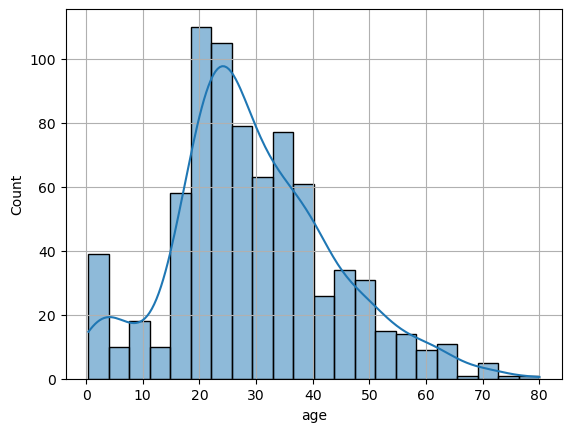

In [218]:
# Check for Normality using the histplot
sns.histplot(titanic.iloc[:,3],kde = 'kind')
plt.grid()

In [219]:
# This is a slightly skewed data

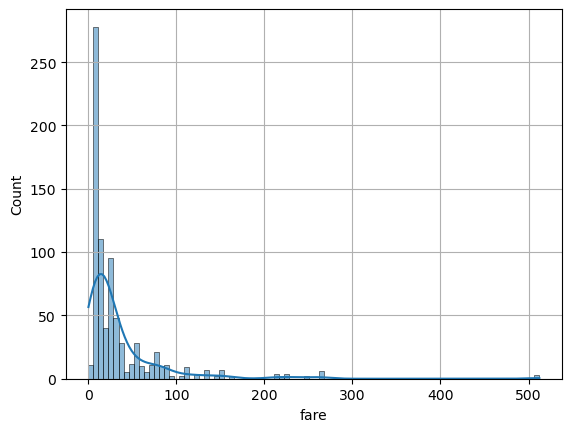

In [220]:
# Check for Normality using the histplot
sns.histplot(titanic.iloc[:,6],kde = 'kind')
plt.grid()

In [221]:
# Fare is highly skewek data so it needs transformation to be more like normal data
# We will use yeo-johnson power transformer on both the continous columns

In [222]:
# We will use Yeo-Johnson Power Transformer
from sklearn.preprocessing import PowerTransformer

In [223]:
# Create an Power Transformer object
yJpT = PowerTransformer()

In [224]:
# We Train the input continous variables with power transformer
yJpT.fit_transform(XcontTrain)

array([[-0.65036256, -0.82146535],
       [-1.04964825, -1.00610234],
       [-0.34989406, -1.03170712],
       ...,
       [-0.27693302, -1.0462755 ],
       [-0.34989406,  1.34055286],
       [ 0.41516367,  0.92599555]])

In [225]:
# To check what lambas were use
# Applied for 2 columns so 2 lambdas
yJpT.lambdas_

array([ 0.72188972, -0.12369202])

In [226]:
XcontTrain.columns, XcontTrain.index

(Index(['age', 'fare'], dtype='object'),
 Int64Index([641, 326, 197, 102, 327, 212, 710, 381, 615, 595,
             ...
             181,  13, 470,  96, 301, 540, 602, 724, 289, 590],
            dtype='int64', length=529))

In [227]:
# Step 1: We will create a transformed data using fit_transform 
x_df_ContTrain = pd.DataFrame(yJpT.fit_transform(XcontTrain),index = XcontTrain.index,columns = XcontTrain.columns )

In [228]:
# Now we will apply the learning to the test data
x_df_contTest = pd.DataFrame(yJpT.transform(XcontTest),index = XcontTest.index,columns = XcontTest.columns )

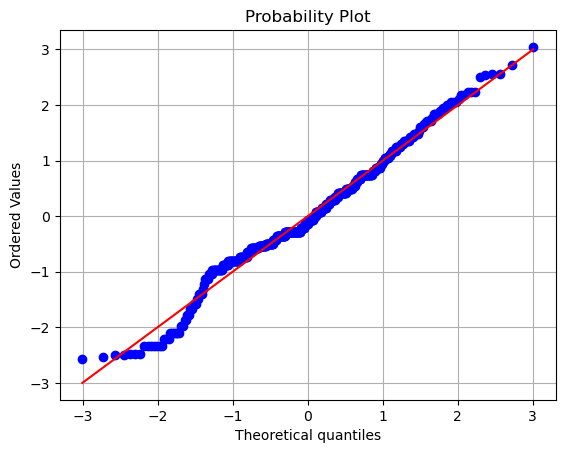

In [229]:
# Check for Normality of Age using the QQ plot
stats.probplot(x_df_ContTrain.iloc[:,0],dist = 'norm', plot=plt)
plt.grid()

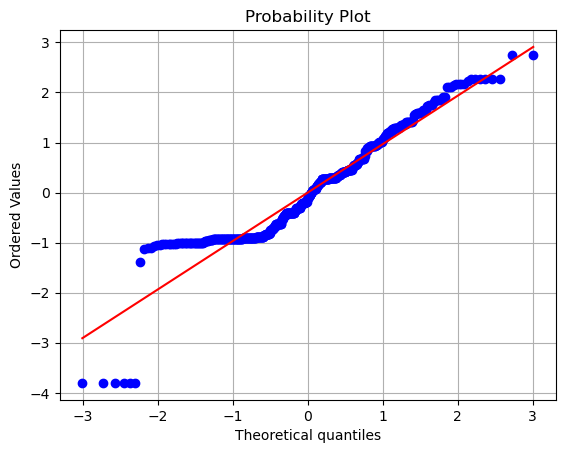

In [230]:
# Check for Normality of fare using the QQ plot
stats.probplot(x_df_ContTrain.iloc[:,1],dist = 'norm', plot=plt)
plt.grid()

In [231]:
# We can see that there is a huge transformation especially for fare that was badly skewed

# Normalization
- Robust Scaler

In [232]:
# Next we would like to scale the data
# For this we need to check is there are any outliers

In [233]:
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

In [234]:
len(find_outliers_IQR(titanic['age']))

13

In [235]:
len(find_outliers_IQR(titanic['fare']))

97

<AxesSubplot:>

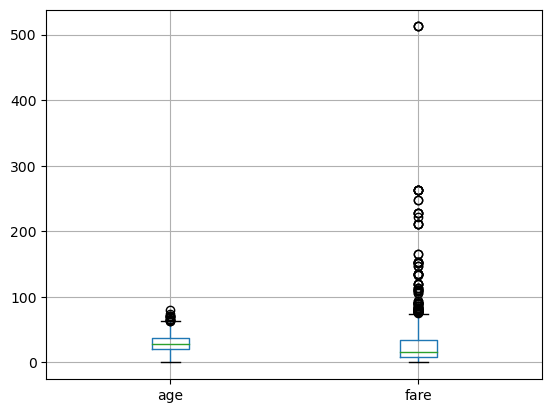

In [236]:
# We can see that there are many outliers in the continous data
# The same can be observer in the boxplots
titanic.boxplot()

In [237]:
# Robust scaler has better way of dealing with marginal outliers 
# So we will go ahead and use Robust Scaler for scaling in the Preprocessing step
from sklearn.preprocessing import RobustScaler

In [238]:
rs = RobustScaler()

In [239]:
rs.fit_transform(x_df_ContTrain)

array([[-0.41356294, -0.46707772],
       [-0.7329266 , -0.58942355],
       [-0.17323699, -0.60639002],
       ...,
       [-0.11488001, -0.61604345],
       [-0.17323699,  0.96553826],
       [ 0.43868486,  0.69084056]])

In [240]:
# Step 1: We will create a transformed data using fit_transform 
rs_x_df_ContTrain = pd.DataFrame(rs.fit_transform(x_df_ContTrain),index = x_df_ContTrain.index,columns = x_df_ContTrain.columns )
rs_x_df_ContTrain

,age,fare
641,-0.413563,-0.467078
326,-0.732927,-0.589424
197,-0.173237,-0.606390
102,-0.322064,0.213558
327,-0.114880,0.014963
...,...,...
540,0.000000,0.362369
602,-0.413563,-0.424538
724,-0.114880,-0.616043
289,-0.173237,0.965538


In [241]:
# Now we will apply the learning to the test data
rs_x_df_contTest = pd.DataFrame(rs.transform(x_df_contTest),index = x_df_contTest.index,columns = x_df_contTest.columns )
rs_x_df_contTest

,age,fare
418,0.385458,-0.516685
94,0.056579,-0.529769
644,-0.114880,0.260923
680,1.525330,-0.337139
166,-0.114880,0.247652
...,...,...
717,0.850835,-0.666449
131,-0.322064,-0.087417
375,-0.352369,-0.540199
235,0.112618,-0.339551


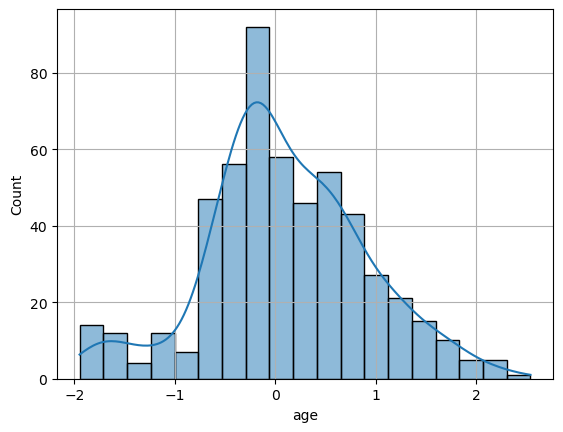

In [242]:
# Check for scaling and Normality using the histplot for age
sns.histplot(rs_x_df_ContTrain.iloc[:,0],kde = 'kind')
plt.grid()

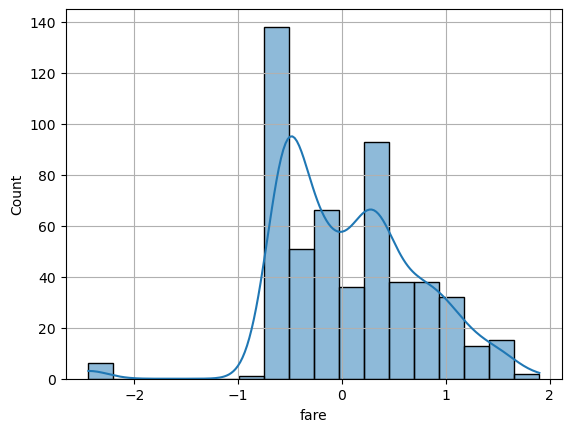

In [243]:
# Check for scaling and Normality using the histplot for fare
sns.histplot(rs_x_df_ContTrain.iloc[:,1],kde = 'kind')
plt.grid()

# Categorical data
- Split to Ordinal vs Nominal

In [244]:
XcatTrain

,pclass,sex,sibsp,parch,adult_male,embark_town,alone
641,3,male,0,0,True,Southampton,True
326,3,male,1,1,False,Cherbourg,False
197,3,male,0,0,True,Southampton,True
102,3,female,1,0,False,Queenstown,False
327,3,male,1,0,True,Southampton,False
...,...,...,...,...,...,...,...
540,1,male,0,0,True,Southampton,True
602,3,male,0,0,True,Southampton,True
724,3,male,0,0,True,Queenstown,True
289,1,female,0,0,False,Cherbourg,True


In [245]:
# pclass - ordinal
# sex - Nominal
# sibsp - ordinal
# parch - ordinal
# adult_male = ordinal
# embarked_town - Nominal
# alone - ordinal
# Ordinal:['pclass','sibsp','parch','adult_male','alone']
# Nominal:['sex','embark_town']

In [246]:
# For ordinal columns we use Ordinal Encoding
# For Nominal we use Leave one out One Hot Encoding
# First we need to seperate Ordinal and Nominal both for Train and Test

In [247]:
XcatTrain

,pclass,sex,sibsp,parch,adult_male,embark_town,alone
641,3,male,0,0,True,Southampton,True
326,3,male,1,1,False,Cherbourg,False
197,3,male,0,0,True,Southampton,True
102,3,female,1,0,False,Queenstown,False
327,3,male,1,0,True,Southampton,False
...,...,...,...,...,...,...,...
540,1,male,0,0,True,Southampton,True
602,3,male,0,0,True,Southampton,True
724,3,male,0,0,True,Queenstown,True
289,1,female,0,0,False,Cherbourg,True


In [248]:
Ord_XcatTrain= XcatTrain[['pclass','sibsp','parch','adult_male','alone']]
Ord_XcatTrain

,pclass,sibsp,parch,adult_male,alone
641,3,0,0,True,True
326,3,1,1,False,False
197,3,0,0,True,True
102,3,1,0,False,False
327,3,1,0,True,False
...,...,...,...,...,...
540,1,0,0,True,True
602,3,0,0,True,True
724,3,0,0,True,True
289,1,0,0,False,True


In [249]:
Nom_XcatTrain= XcatTrain[['sex','embark_town']]
Nom_XcatTrain

,sex,embark_town
641,male,Southampton
326,male,Cherbourg
197,male,Southampton
102,female,Queenstown
327,male,Southampton
...,...,...
540,male,Southampton
602,male,Southampton
724,male,Queenstown
289,female,Cherbourg


In [250]:
XcatTest

,pclass,sex,sibsp,parch,adult_male,embark_town,alone
418,3,male,0,0,True,Southampton,True
94,3,female,0,0,False,Southampton,True
644,2,male,1,0,True,Southampton,False
680,2,female,0,0,False,Southampton,True
166,3,male,3,1,True,Southampton,False
...,...,...,...,...,...,...,...
717,3,male,0,0,True,Southampton,True
131,3,female,0,2,False,Cherbourg,False
375,3,male,0,0,True,Southampton,True
235,3,female,1,1,False,Southampton,False


In [251]:
Ord_XcatTest= XcatTest[['pclass','sibsp','parch','adult_male','alone']]
Ord_XcatTest

,pclass,sibsp,parch,adult_male,alone
418,3,0,0,True,True
94,3,0,0,False,True
644,2,1,0,True,False
680,2,0,0,False,True
166,3,3,1,True,False
...,...,...,...,...,...
717,3,0,0,True,True
131,3,0,2,False,False
375,3,0,0,True,True
235,3,1,1,False,False


In [252]:
Nom_XcatTest= XcatTest[['sex','embark_town']]
Nom_XcatTest

,sex,embark_town
418,male,Southampton
94,female,Southampton
644,male,Southampton
680,female,Southampton
166,male,Southampton
...,...,...
717,male,Southampton
131,female,Cherbourg
375,male,Southampton
235,female,Southampton


# Ordinal Encoding

In [253]:
# First we will deal with Ordinal Categorical data using Ordinal Encoder
from sklearn.preprocessing import OrdinalEncoder

In [254]:
# Get the unique columns in all the ordinal categorical columns
for i in Ord_XcatTrain.columns:
    print(i, Ord_XcatTrain[i].unique())

pclass [3 2 1]
sibsp [0 1 3 4 2 5 8]
parch [0 1 2 5 3 4 6]
adult_male [True False]
alone [True False]


In [255]:
# In ordrinal encoding the categories need to be in ascending order
# My order is as below:
# ranked pclass, sibsp, parch bottom to top. 
# ranked with being adult_male not good for survival so False got higher rating
# ranked with being alone not good for survival so False got higher rating
oe = OrdinalEncoder(categories=[[1,2,3],[0,1,2,3,4,5,8],[0,1,2,3,4,5,6],[True,False],[True,False]])

In [256]:
Ord_XcatTrain.index

Int64Index([641, 326, 197, 102, 327, 212, 710, 381, 615, 595,
            ...
            181,  13, 470,  96, 301, 540, 602, 724, 289, 590],
           dtype='int64', length=529)

In [257]:
# Step 1: We will create a transformed data using fit_transform 
df_Ord_XcatTrain = pd.DataFrame(oe.fit_transform(Ord_XcatTrain),index = Ord_XcatTrain.index,columns = Ord_XcatTrain.columns)
df_Ord_XcatTrain

,pclass,sibsp,parch,adult_male,alone
641,2.0,0.0,0.0,0.0,0.0
326,2.0,1.0,1.0,1.0,1.0
197,2.0,0.0,0.0,0.0,0.0
102,2.0,1.0,0.0,1.0,1.0
327,2.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...
540,0.0,0.0,0.0,0.0,0.0
602,2.0,0.0,0.0,0.0,0.0
724,2.0,0.0,0.0,0.0,0.0
289,0.0,0.0,0.0,1.0,0.0


In [258]:
# Now we will apply the learning to the test data
df_Ord_XcatTest = pd.DataFrame(oe.fit_transform(Ord_XcatTest),index = Ord_XcatTest.index,columns = Ord_XcatTest.columns)
df_Ord_XcatTest

,pclass,sibsp,parch,adult_male,alone
418,2.0,0.0,0.0,0.0,0.0
94,2.0,0.0,0.0,1.0,0.0
644,1.0,1.0,0.0,0.0,1.0
680,1.0,0.0,0.0,1.0,0.0
166,2.0,3.0,1.0,0.0,1.0
...,...,...,...,...,...
717,2.0,0.0,0.0,0.0,0.0
131,2.0,0.0,2.0,1.0,1.0
375,2.0,0.0,0.0,0.0,0.0
235,2.0,1.0,1.0,1.0,1.0


In [259]:
# We can see that the order is as requested
for i in df_Ord_XcatTrain.columns:
    print(i, df_Ord_XcatTrain[i].unique())

pclass [2. 1. 0.]
sibsp [0. 1. 3. 4. 2. 5. 6.]
parch [0. 1. 2. 5. 3. 4. 6.]
adult_male [0. 1.]
alone [0. 1.]


# One Hot Endoding
- Dont have too many classes so we will just use One Hot Encoding
- Used on Nominal Categorical data

In [260]:
# Import module from sklearn library
from sklearn.preprocessing import OneHotEncoder

In [261]:
# Create an object of OneHotEncoder class
# Since we want to use the complete matrix we set sparse = False
ohe = OneHotEncoder(sparse = False)

In [262]:
# Step 1: We will create a transformed data using fit_transform 
df_Nom_XcatTrain = pd.DataFrame(ohe.fit_transform(Nom_XcatTrain),index = Nom_XcatTrain.index,columns = ohe.get_feature_names_out(Nom_XcatTrain.columns))
df_Nom_XcatTrain

,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
641,0.0,1.0,0.0,0.0,1.0
326,0.0,1.0,1.0,0.0,0.0
197,0.0,1.0,0.0,0.0,1.0
102,1.0,0.0,0.0,1.0,0.0
327,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...
540,0.0,1.0,0.0,0.0,1.0
602,0.0,1.0,0.0,0.0,1.0
724,0.0,1.0,0.0,1.0,0.0
289,1.0,0.0,1.0,0.0,0.0


In [263]:
# Now we will apply the learning to the test data
df_Nom_XcatTest = pd.DataFrame(ohe.transform(Nom_XcatTest),index = Nom_XcatTest.index,columns = ohe.get_feature_names_out(Nom_XcatTest.columns))
df_Nom_XcatTest

,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
418,0.0,1.0,0.0,0.0,1.0
94,1.0,0.0,0.0,0.0,1.0
644,0.0,1.0,0.0,0.0,1.0
680,1.0,0.0,0.0,0.0,1.0
166,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...
717,0.0,1.0,0.0,0.0,1.0
131,1.0,0.0,1.0,0.0,0.0
375,0.0,1.0,0.0,0.0,1.0
235,1.0,0.0,0.0,0.0,1.0


In [264]:
# We can check that the One-Hot Encoding is performed on Nominal Categorical Train and Test sets
df_Nom_XcatTrain

,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
641,0.0,1.0,0.0,0.0,1.0
326,0.0,1.0,1.0,0.0,0.0
197,0.0,1.0,0.0,0.0,1.0
102,1.0,0.0,0.0,1.0,0.0
327,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...
540,0.0,1.0,0.0,0.0,1.0
602,0.0,1.0,0.0,0.0,1.0
724,0.0,1.0,0.0,1.0,0.0
289,1.0,0.0,1.0,0.0,0.0


In [265]:
df_Nom_XcatTest

,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
418,0.0,1.0,0.0,0.0,1.0
94,1.0,0.0,0.0,0.0,1.0
644,0.0,1.0,0.0,0.0,1.0
680,1.0,0.0,0.0,0.0,1.0
166,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...
717,0.0,1.0,0.0,0.0,1.0
131,1.0,0.0,1.0,0.0,0.0
375,0.0,1.0,0.0,0.0,1.0
235,1.0,0.0,0.0,0.0,1.0


# Input Variable Dataset I 
- Creating a Dataset of Un-Tranformed and Un-Scaled continous variables and Encoded categorical variables
- That is continous variables are not changed only categorical encoding is done

In [266]:
# From above we will be using following DataFrames
# for Input Training : XcontTrain,df_Ord_XcatTrain,df_Nom_XcatTrain
# for Input Testing : XcontTest,df_Ord_XcatTest,df_Nom_XcatTest

In [267]:
df_Ord_XcatTrain

,pclass,sibsp,parch,adult_male,alone
641,2.0,0.0,0.0,0.0,0.0
326,2.0,1.0,1.0,1.0,1.0
197,2.0,0.0,0.0,0.0,0.0
102,2.0,1.0,0.0,1.0,1.0
327,2.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...
540,0.0,0.0,0.0,0.0,0.0
602,2.0,0.0,0.0,0.0,0.0
724,2.0,0.0,0.0,0.0,0.0
289,0.0,0.0,0.0,1.0,0.0


In [268]:
df_Nom_XcatTrain

,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
641,0.0,1.0,0.0,0.0,1.0
326,0.0,1.0,1.0,0.0,0.0
197,0.0,1.0,0.0,0.0,1.0
102,1.0,0.0,0.0,1.0,0.0
327,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...
540,0.0,1.0,0.0,0.0,1.0
602,0.0,1.0,0.0,0.0,1.0
724,0.0,1.0,0.0,1.0,0.0
289,1.0,0.0,1.0,0.0,0.0


In [269]:
# Concatenating Ordinal and Nominal Categorical columns
# For Train dataset 
ds1_Xcat_Train = pd.concat([df_Ord_XcatTrain,df_Nom_XcatTrain],axis=1)
ds1_Xcat_Train

,pclass,sibsp,parch,adult_male,alone,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
641,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
326,2.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
197,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
102,2.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
327,2.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
540,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
602,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
724,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
289,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [270]:
# Concatenating Ordinal and Nominal Categorical columns
# For Test dataset 
ds1_Xcat_Test = pd.concat([df_Ord_XcatTest,df_Nom_XcatTest],axis=1)
ds1_Xcat_Test

,pclass,sibsp,parch,adult_male,alone,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
418,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
94,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
644,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
680,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
166,2.0,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
717,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
131,2.0,0.0,2.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
375,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
235,2.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0


In [271]:
# Concatenating Continous and Categorical columns
# For Train dataset 
ds1_X_Train = pd.concat([XcontTrain,ds1_Xcat_Train],axis=1)
ds1_X_Train

,age,fare,pclass,sibsp,parch,adult_male,alone,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
641,20.0,8.6625,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
326,15.0,7.2292,2.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
197,24.0,7.0500,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
102,21.5,24.1500,2.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
327,25.0,17.8000,2.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,27.0,30.5000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
602,20.0,9.2250,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
724,25.0,6.9500,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
289,24.0,83.1583,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [272]:
# Concatenating Continous and Categorical columns
# For Test dataset 
ds1_X_Test = pd.concat([XcontTest,ds1_Xcat_Test],axis=1)
ds1_X_Test

,age,fare,pclass,sibsp,parch,adult_male,alone,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
418,34.00,8.0500,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
94,28.00,7.8958,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
644,25.00,26.0000,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
680,57.00,10.5000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
166,25.00,25.4667,2.0,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
717,43.00,6.4500,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
131,21.50,15.2458,2.0,0.0,2.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
375,21.00,7.7750,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
235,29.00,10.4625,2.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0


In [273]:
# Dataset I is ready with ds1_X_Train, ds1_X_Test
# yTrain and yTest are still from the cleaned Titanic Dataset i.e 'survived' column
# This is a categorical column so that task is Classfication
# We will use both 'Logistic Regression' and 'Decision Tree Classifier' to check 'accuracy score' and read 'confusion matrix'

# Input Variable Dataset II 
- Creating a Dataset of Tranformed and Scaled continous variables and Encoded categorical variables

In [274]:
# From above we will be using following DataFrames
# for Input Training : rs_x_df_ContTrain,df_Ord_XcatTrain,df_Nom_XcatTrain
# for Input Testing : rs_x_df_contTest,df_Ord_XcatTest,df_Nom_XcatTest

In [275]:
# Categorical columns are same for Dataset I and Dataset II
# So we will concat that categorical data to Scaled and Transformed contionous data

In [276]:
# Concatenating Continous and Categorical columns
# For Train dataset 
ds2_X_Train = pd.concat([rs_x_df_ContTrain,ds1_Xcat_Train],axis=1)
ds2_X_Train

,age,fare,pclass,sibsp,parch,adult_male,alone,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
641,-0.413563,-0.467078,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
326,-0.732927,-0.589424,2.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
197,-0.173237,-0.606390,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
102,-0.322064,0.213558,2.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
327,-0.114880,0.014963,2.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.000000,0.362369,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
602,-0.413563,-0.424538,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
724,-0.114880,-0.616043,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
289,-0.173237,0.965538,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [277]:
# Concatenating Continous and Categorical columns
# For Test dataset 
ds2_X_Test = pd.concat([rs_x_df_contTest,ds1_Xcat_Test],axis=1)
ds2_X_Test

,age,fare,pclass,sibsp,parch,adult_male,alone,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
418,0.385458,-0.516685,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
94,0.056579,-0.529769,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
644,-0.114880,0.260923,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
680,1.525330,-0.337139,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
166,-0.114880,0.247652,2.0,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
717,0.850835,-0.666449,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
131,-0.322064,-0.087417,2.0,0.0,2.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
375,-0.352369,-0.540199,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
235,0.112618,-0.339551,2.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0


In [278]:
# Dataset II is ready with ds2_X_Train, ds2_X_Test
# yTrain and yTest are still from the cleaned Titanic Dataset i.e 'survived' column
# This is a categorical column so that task is Classfication
# We will use both 'Logistic Regression' and 'Decision Tree Classifier' to check 'accuracy score' and read 'confusion matrix'

# Evaluation will follow Model Creation

# Accuracy Check

In [279]:
from sklearn.metrics import accuracy_score as acs

# We use confusion matrix to see what the predictions were

In [280]:
from sklearn.metrics import confusion_matrix

# Logistic Regression

In [281]:
# Import your model
from sklearn.linear_model import LogisticRegression

In [282]:
# We create a Logistic Regression object
lr = LogisticRegression()

# Logistic Regression on only Encoded Titanic dataset

In [283]:
type(ds1_X_Train)

pandas.core.frame.DataFrame

In [284]:
# fit function is not accepting object type so converting to int
yTrain = yTrain.astype(int)
yTest = yTest.astype(int)

In [285]:
type(yTrain)

pandas.core.series.Series

In [286]:
# Fit our Non Transformed, Non Scaled, Encoded training data
lr.fit(ds1_X_Train,yTrain)

C:\Users\Kishore\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [287]:
# We predict our yTrain (to just check if it is overfitting) and yTest 
# Model predicts based on ds1_X_Train and ds1_X_Test and we compare these
lr_yTrainPred_org = dtc.predict(ds1_X_Train)
lr_yTestPred_org = dtc.predict(ds1_X_Test)

In [288]:
acs(yTrain,lr_yTrainPred_org)

0.9262759924385633

In [289]:
acs(yTest,lr_yTestPred_org)

0.8755020080321285

In [290]:
# For train data we have an accuracy of 99% and for test data we have a accuracy of 73% only
# There might be a dip in accuracy because of overfitting

In [291]:
confusion_matrix(yTrain,lr_yTrainPred_org)

array([[288,  15],
       [ 24, 202]], dtype=int64)

In [292]:
yTrain.value_counts()

0    303
1    226
Name: survived, dtype: int64

In [293]:
# Conclusions from confusion_matrix for train data
# out of 314 Dead All were predicted correct
# out of 215 survived 210 were predicted correct and 5 were predicted wrong

In [294]:
confusion_matrix(yTest,lr_yTestPred_org)

array([[133,  19],
       [ 12,  85]], dtype=int64)

In [295]:
yTest.value_counts()

0    152
1     97
Name: survived, dtype: int64

In [296]:
# Conclusions from confusion_matrix for train data
# out of 141 Dead 107 were predicted correct and 34 were predicted wrong
# out of 108 survived 77 were predicted correct and 31 were predicted wrong

# Logistic Regression on Transformed and Encoded Titanic Dataset

In [297]:
# Fit our Transformed, Scaled, Encoded training data
lr.fit(ds2_X_Train,yTrain)

LogisticRegression()

In [298]:
# We predict our yTrain (to just check if it is overfitting) and yTest 
# Model predicts based on ds2_X_Train and ds2_X_Test and we compare these
lr_yTrainPred_tra = dtc.predict(ds2_X_Train)
lr_yTestPred_tra = dtc.predict(ds2_X_Test)

In [299]:
acs(yTrain,lr_yTrainPred_tra)

0.722117202268431

In [300]:
acs(yTest,lr_yTestPred_tra)

0.7389558232931727

In [301]:
# For train data we have an accuracy of 71% and for test data we have a accuracy of 75%
# The training data here did not learn well
# The test accuracy increased this might be because of transformation and scaling of continous variables

In [302]:
confusion_matrix(yTrain,lr_yTrainPred_tra)

array([[185, 118],
       [ 29, 197]], dtype=int64)

In [303]:
# Conclusions from confusion_matrix for train data
# out of 314 Dead All were predicted correct
# out of 215 survived 210 were predicted correct and 5 were predicted wrong

In [304]:
confusion_matrix(yTest,lr_yTestPred_tra)

array([[101,  51],
       [ 14,  83]], dtype=int64)

In [305]:
# Conclusions from confusion_matrix for train data
# out of 141 Dead 107 were predicted correct and 34 were predicted wrong
# out of 108 survived 77 were predicted correct and 31 were predicted wrong

# Decision Tree Classifier

In [306]:
# Import your model Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [307]:
dtc = DecisionTreeClassifier()

# Decision Tree Classifier on only Encoded Titanic dataset

In [308]:
# Fit our Non Transformed, Non Scaled, Encoded training data
dtc.fit(ds1_X_Train,yTrain)

DecisionTreeClassifier()

In [309]:
# We predict our yTrain (to just check if it is overfitting) and yTest 
# Model predicts based on ds1_X_Train and ds1_X_Test and we compare these
dtc_yTrainPred_org = dtc.predict(ds1_X_Train)
dtc_yTestPred_org = dtc.predict(ds1_X_Test)

In [310]:
acs(yTrain,dtc_yTrainPred_org)

0.9905482041587902

In [311]:
acs(yTest,dtc_yTestPred_org)

0.7188755020080321

In [312]:
# For train data we have an accuracy of 99% and for test data we have a accuracy of 73% only
# There might be a dip in accuracy because of overfitting

In [313]:
confusion_matrix(yTrain,dtc_yTrainPred_org)

array([[303,   0],
       [  5, 221]], dtype=int64)

In [314]:
# Conclusions from confusion_matrix for train data
# out of 314 Dead All were predicted correct
# out of 215 survived 210 were predicted correct and 5 were predicted wrong

In [315]:
confusion_matrix(yTest,dtc_yTestPred_org)

array([[111,  41],
       [ 29,  68]], dtype=int64)

In [316]:
# Conclusions from confusion_matrix for train data
# out of 141 Dead 107 were predicted correct and 34 were predicted wrong
# out of 108 survived 77 were predicted correct and 31 were predicted wrong

# Decision Tree Classifier on Transformed and Encoded Titanic Dataset

In [317]:
# Fit our Transformed, Scaled, Encoded training data
dtc.fit(ds2_X_Train,yTrain)

DecisionTreeClassifier()

In [318]:
# We predict our yTrain (to just check if it is overfitting) and yTest 
# Model predicts based on ds2_X_Train and ds2_X_Test and we compare these
dtc_yTrainPred_tra = dtc.predict(ds2_X_Train)
dtc_yTestPred_tra = dtc.predict(ds2_X_Test)

In [319]:
acs(yTrain,dtc_yTrainPred_tra)

0.9905482041587902

In [320]:
acs(yTest,dtc_yTestPred_tra)

0.7108433734939759

In [321]:
# For train data we have an accuracy of 71% and for test data we have a accuracy of 75%
# The training data here did not learn well
# The test accuracy increased this might be because of transformation and scaling of continous variables

In [322]:
confusion_matrix(yTrain,dtc_yTrainPred_tra)

array([[303,   0],
       [  5, 221]], dtype=int64)

In [323]:
# Conclusions from confusion_matrix for train data
# out of 314 Dead 190 were predicted correct and 124 were predicted wrong
# out of 215 survived 189 were predicted correct and 26 were predicted wrong

In [324]:
confusion_matrix(yTest,dtc_yTestPred_tra)

array([[111,  41],
       [ 31,  66]], dtype=int64)

In [325]:
# Conclusions from confusion_matrix for train data
# out of 141 Dead 96 were predicted correct and 45 were predicted wrong
# out of 108 survived 91 were predicted correct and 17 were predicted wrong

# Conclusion based on accuracy levels: Test Accuracy is better when Continous input variables are transformed and Scaled